In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

## Example Data
4 x 2 dimensional data

n = 4, number of features = 2

In [101]:
X = np.array(
    [[2,0],
     [4,2],
     [0,1],
     [1,3]]
)
y = np.array([1,1,2,2])
print(f'X = \n {X},\n y = \n{y}')

X = 
 [[2 0]
 [4 2]
 [0 1]
 [1 3]],
 y = 
[1 1 2 2]


In [102]:
df = pd.DataFrame()
df['Feature1'] = X[:, 0]
df['Feature2'] = X[:, 1]
df['class'] = y
df.head()

,Feature1,Feature2,class
0,2,0,1
1,4,2,1
2,0,1,2
3,1,3,2


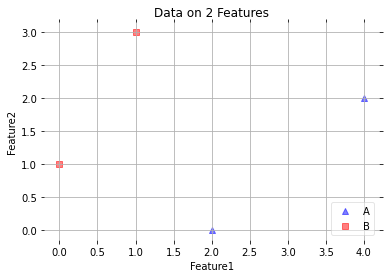

In [103]:
label_dict = {1:'A', 2:'B'}

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(x=X[:,0].real[y == label],
                y=X[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('Feature1')
    plt.ylabel('Feature2')

    leg = plt.legend(loc='lower right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('Data on 2 Features')
    # plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [104]:
mean_vectors = []
for c in range(1,3):
    mean_vectors.append(np.mean(X[y==c], axis=0))
    print('Mean Vector class %s: %s\n' %(c, mean_vectors[c-1]))

Mean Vector class 1: [3. 1.]

Mean Vector class 2: [0.5 2. ]



In [105]:
S_W = np.zeros((2,2))
for cl,mv in zip(range(1,3), mean_vectors):
    class_sc_mat = np.zeros((2,2))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(2,1), mv.reshape(2,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[2.5 3. ]
 [3.  4. ]]


In [106]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((2,2))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(2,1) # make column vector
    overall_mean = overall_mean.reshape(2,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('between-class Scatter Matrix:\n', S_B)

between-class Scatter Matrix:
 [[ 6.25 -2.5 ]
 [-2.5   1.  ]]


In [140]:
np.linalg.inv(S_W).dot(S_B)

array([[ 32.5, -13. ],
       [-25. ,  10. ]])

In [107]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(2,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.79262399]
 [-0.60971076]]
Eigenvalue 1: 4.25e+01

Eigenvector 2: 
[[0.37139068]
 [0.92847669]]
Eigenvalue 2: 1.78e-15


In [108]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

42.500000000000036
1.7763568394002505e-15


In [109]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variance explained:

eigenvalue 1: 100.00%
eigenvalue 2: 0.00%


In [110]:
W = np.hstack((eig_pairs[0][1].reshape(2,1), eig_pairs[1][1].reshape(2,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[ 0.79262399  0.37139068]
 [-0.60971076  0.92847669]]


### Linear Transform X

In [111]:
X_lda = X.dot(W)

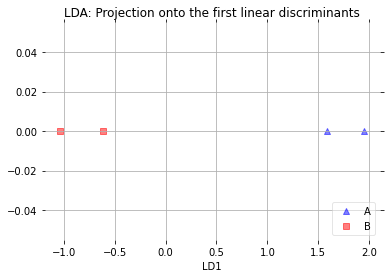

In [139]:
label_dict = {1:'A', 2:'B'}
y_lda = np.array([0,0,0,0])

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,3),('^', 's'),('blue', 'red')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=y_lda.real[y == label],
                # y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    # plt.ylabel('LD2')

    leg = plt.legend(loc='lower right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Projection onto the first linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()